# Лабораторная работа 6
**Тема.** Элементы операционного исчисления
<br>
**Цель.** Научиться находить изображение Лапласа для функций-оригиналов, решать обратную задачу, применять операторный метод для решения задачи Коши и контролировать результаты с помощью средств системы СКА.

## **Задание 1.** По данному графику оригинала найти изображение. Получить ответ в СКА и сравнить результаты.

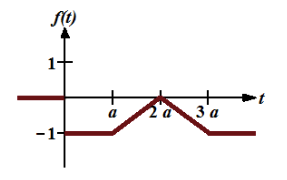

Возьмем `a` за определенную константу.

In [1]:
a = 1
t, s = var('t s')

Определим функцию через `piecewise`.

In [2]:
f = piecewise([
    [(-oo, 0), 0],
    [RealSet.closed_open(0, a), -1],
    [RealSet.closed_open(a, 2*a), -1 + (t - a)/a],
    [RealSet.closed_open(2*a, 3*a), 1 - (t - a)/a],
    [RealSet.closed_open(3*a, oo), -1]
])
show(f)

piecewise(t|-->0 on (-oo, 0), t|-->-1 on [0, 1), t|-->t - 2 on [1, 2), t|-->-t + 2 on [2, 3), t|-->-1 on [3, +oo); t)

Построим график

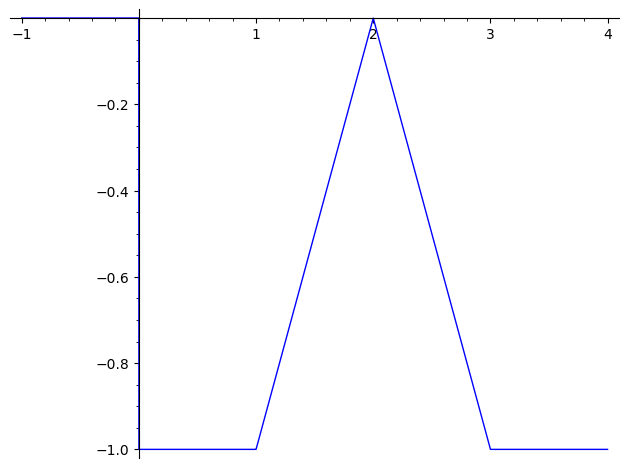

In [3]:
show(plot(f, (t,-1,4)))

Выполнить выполним преобразование Лапласа через встроенную функцию `laplace`, где
- `x`: собственное значение (в нашем случае `t`)
- `s`: значение для преобразования Лапласа

In [4]:
show(f.laplace(t, s))

-(s - 1)*e^(-s)/s^2 + e^(-s)/s + (s + 1)*e^(-3*s)/s^2 - e^(-3*s)/s - 1/s - 2*e^(-2*s)/s^2

## **Задание 2.** Найдите оригинал по заданному изображению «вручную» и с помощью команды СКА. При разложении на сумму простейших дробей контролируйте свои результаты с результатами, полученными системой.

In [5]:
var('p, t')

(p, t)

Определим изображение

In [6]:
f = p / ((p + 1) * (p ** 2 + p + 1))
show(f)

p/((p^2 + p + 1)*(p + 1))

Обратное преобразование Лапласа может быть выполнено через `inverse_laplace`, где
- `ex`: выражение
- `s`: параметр транформации
- `t`: переменная
- `algorithm`: (по умолчанию `maxima`) один из
  - `maxima` – использовать Maxima
  - `sympy` – использовать SymPy
  - `giac` – использовать Giac


In [7]:
f_t = inverse_laplace(f, p, t)
show(f_t)

1/3*(sqrt(3)*sin(1/2*sqrt(3)*t) + 3*cos(1/2*sqrt(3)*t))*e^(-1/2*t) - e^(-t)

## **Задание 3.** Найдите решение дифференциального уравнения, удовлетворяющее условиям $ y(0) = 0 $ и $ y'(0) = 0 $, операторным методом (используя интеграл Дюамеля) и методом Лагранжа. Сравните результаты и проконтролируйте их с помощью СКА.

In [8]:
t, s = var('t s')
y = function('y')(t)

eq = diff(y, t, 2) - diff(y, t) == 1/(1 + exp(t))
assume(t > 0)

Начнем с операторного метода (через интеграл Дюамеля). Вычислим чистое ядро.

In [9]:
G = 1/(s*(s-1))
g = inverse_laplace(G, s, t).simplify_full()
show(g)

e^t - 1

В свертке оно проявится как $ g(t-s) $. Выполним вычисление интеграла Дюамеля.

In [10]:
g = g.subs(t=t-s)
f = 1/(1+exp(s))
y_duhamel = integral(g * f, (s, 0, t)).simplify_full()
show(y_duhamel)

-(t + log(2) - 1)*e^t + (e^t + 1)*log(e^t + 1) - t - log(2) - 1

Далее, метод Лагранжа. В **Sagemath** он используется по умолчанию в `desolve`. Главное задать начальные условия.

In [11]:
sol_lagrange = desolve(eq, y, ics=[0, 0, 0]).simplify_full()
show(sol_lagrange)

-(log(2) - 1)*e^t + e^t*log((e^t + 1)*e^(-t)) - t - log(2) + log(e^t + 1) - 1

Проверим выполнение начальных условий

In [12]:
y0 = sol_lagrange.subs(t=0)
dy0 = diff(sol_lagrange, t).subs(t=0)

show("y(0) =", y0)
show("y'(0) =", dy0)

'y(0) =' 0

"y'(0) =" 0

Проверка, что решение удовлетворяет ОДУ

In [13]:
lhs = (diff(sol_lagrange, t, 2) - diff(sol_lagrange, t)).simplify_full()
rhs = (1/(1+exp(t))).simplify_full()
show("LHS - RHS =", (lhs - rhs).simplify_full())

'LHS - RHS =' 0

## **Задание 4.** Операторным методом решите задачу Коши и сравните с решением СКА.

$$
\begin{cases}
      y'' + 4y' + 29y = e^{-2t}\\
      y(0)=0, y'(0)=1
\end{cases}
$$

In [14]:
t, s = var('t s')

Возьмем Лаплас-преобразование всего уравнения.
$$
L\{y'' + 4y' + 29y\} = L\{e^{-2t}\}
$$
C учетом начальных условий имеем:
$$
L\{y''\} + 4L\{y'\} + 29L\{y\} = \frac{1}{s+2}
$$

$$
(s^2Y(s)-sy(0)-y'(0))+4(sY(s)+29Y(s)=\frac{1}{s+2}
$$

Подставим начальные условия и упростим, на выходе получим:
$$
Y(s) = \frac{1}{s+2} \cdot \frac{1}{s^2+4s+29} + \frac{1}{s^2+4s+29}
$$
Решим в СКА.

In [15]:
f = exp(-2*t)

F_s = laplace(f, t, s)
Y_s = (F_s + 1) * (1 / (s^2 + 4*s + 29))
show("Y(s)=", Y_s)

'Y(s)=' (1/(s + 2) + 1)/(s^2 + 4*s + 29)

Далее выполним обратное преобразование Лапласа

In [16]:
y_t = inverse_laplace(Y_s, s, t)
show(y_t)

-1/25*(cos(5*t) - 5*sin(5*t))*e^(-2*t) + 1/25*e^(-2*t)

## **Задание 5.** Решите систему дифференциальных уравнений операторным методом. Сравните с решением, полученным в СКА.

$$
\begin{cases}
      x'(t) = -x(t) + 3y(t) + 1\\
      y'(t) = x(t) + y(t)
\end{cases}
$$
$$
x(0)=1, \space y(0)=2
$$

In [17]:
s, X, Y, t = var('s X Y t')

Решение операторным методом предполагает использование преобразования Лапласа. 
$$
L\{x(t)\} = X(s), \space L\{y(t)\} = Y(s)
$$
Тогда:
$$
\begin{cases}
      sX(s) - x(0) = -X(s) + 3Y(s) + \frac{1}{s}\\
      sY(s) - y(0) = X(s) + Y(s)
\end{cases}
$$
Подставим начальные условия $ x(0)=1, \space y(0) = 2 $ и упростим систему:
$$
\begin{cases}
      (s+1)X(s) - 3Y(s) = 1 + \frac{1}{s} \\
      -X(s) + (s - 1)Y(s) = 2
\end{cases}
$$

Опишем систему

In [18]:
eq1 = (s+1)*X - 3*Y - (1 + 1/s) == 0
eq2 = -X + (s-1)*Y - 2 == 0

Решим систему

In [19]:
sol = solve([eq1, eq2], X, Y)
show(sol[0][0])
show(sol[0][1])

X_s = sol[0][0].rhs()
Y_s = sol[0][1].rhs()

X == (s^2 + 6*s - 1)/(s^3 - 4*s)

Y == (2*s^2 + 3*s + 1)/(s^3 - 4*s)

Выполним обратное преобразование Лапласа

In [20]:
x_t = inverse_laplace(X_s, s, t)
y_t = inverse_laplace(Y_s, s, t)

show("x(t) =", x_t)
show("y(t) =", y_t)

'x(t) =' 15/8*e^(2*t) - 9/8*e^(-2*t) + 1/4

'y(t) =' 15/8*e^(2*t) + 3/8*e^(-2*t) - 1/4

Проверим решение через стандартную функцию `desolve_system`. Она также использует преобразование Лапласа (в [документации](https://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html#sage.calculus.desolvers.desolve_system) даже отдельно прописано, что системы из одного уравнения решаются прямо через `desolve_laplace`).

In [21]:
x = function('x')(t)
y = function('y')(t)

de1 = diff(x,t) == -x + 3*y + 1
de2 = diff(y,t) == x + y

sol_ode = desolve_system([de1, de2], [x, y], ics=[0,1,2])
show(sol_ode[0])
show(sol_ode[1])

x(t) == 15/8*e^(2*t) - 9/8*e^(-2*t) + 1/4

y(t) == 15/8*e^(2*t) + 3/8*e^(-2*t) - 1/4